In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df = pd.read_csv('drive/MyDrive/MyDrive/Data/CLUSTER/DATASET_CLUSTER_MESES.csv', sep=';', decimal=',')

In [12]:
df.head()

,Provincia,Covid Junio,Tem. Media Junio,Gasto Medio Junio,Casos Covid Julio,Tem. Media Julio,Gasto Medio Julio,Covid Agosto,Tem. Media Agosto,Gasto MedioAgosto
0,Barcelona,357836,21.5,163,515673,24.6,165,364973,24.7,158
1,Girona,46339,21.3,163,64621,24.4,165,47222,24.4,158
2,Madrid,147880,21.9,231,217667,26.4,252,175203,25.5,271
3,Málaga,14422,26.7,120,29767,28.0,123,19408,25.8,122
4,Mallorca,47392,23.5,158,70203,27.0,184,55212,27.1,184


In [13]:
df.columns

Index(['Provincia', 'Covid Junio', 'Tem. Media Junio', 'Gasto Medio Junio',
       'Casos Covid Julio', 'Tem. Media Julio', 'Gasto Medio Julio',
       'Covid Agosto', 'Tem. Media Agosto', 'Gasto MedioAgosto'],
      dtype='object')

In [14]:
num_vars = ['Covid Junio','Tem. Media Junio',	'Gasto Medio Junio','Casos Covid Julio','Tem. Media Julio',	'Gasto Medio Julio',	'Covid Agosto', 'Tem. Media Agosto',	'Gasto MedioAgosto']

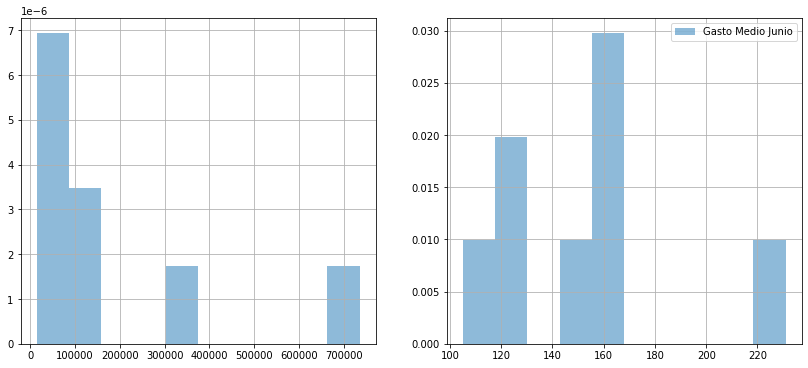

In [15]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
df['Covid Junio'].hist(bins=10,label='Covid Junio',alpha=0.5, density=True, ax=ax[0])
df['Gasto Medio Junio'].hist(bins=10,label='Gasto Medio Junio',alpha=0.5, density=True, ax= ax[1])
plt.legend()

No handles with labels found to put in legend.


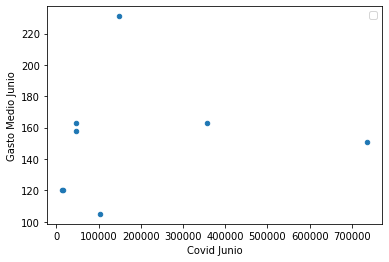

In [16]:
df[['Covid Junio', 'Gasto Medio Junio']].plot.scatter('Covid Junio', 'Gasto Medio Junio')
plt.legend()

In [17]:
import seaborn as sns 

Covid Junio
Tem. Media Junio
Gasto Medio Junio
Casos Covid Julio
Tem. Media Julio
Gasto Medio Julio
Covid Agosto
Tem. Media Agosto
Gasto MedioAgosto


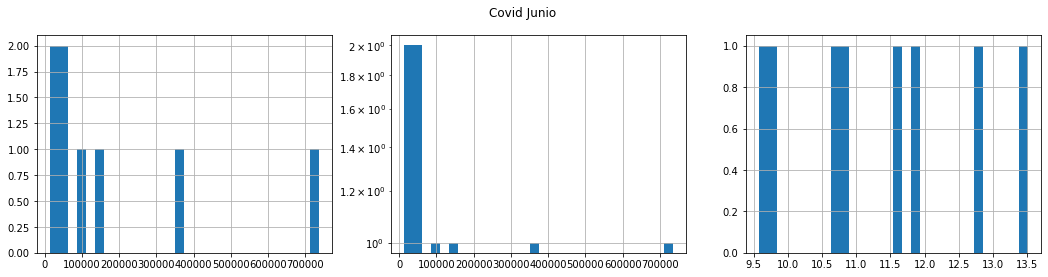

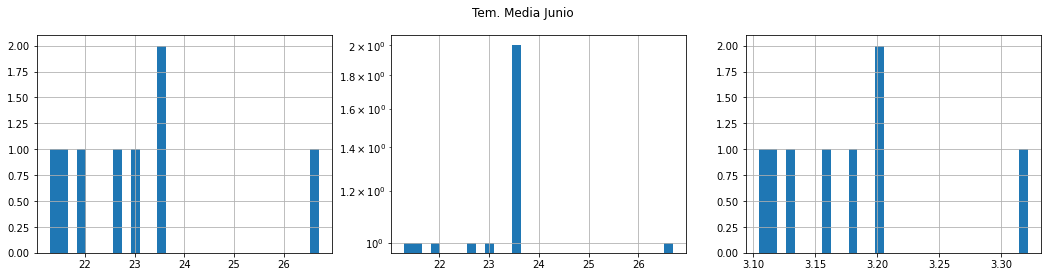

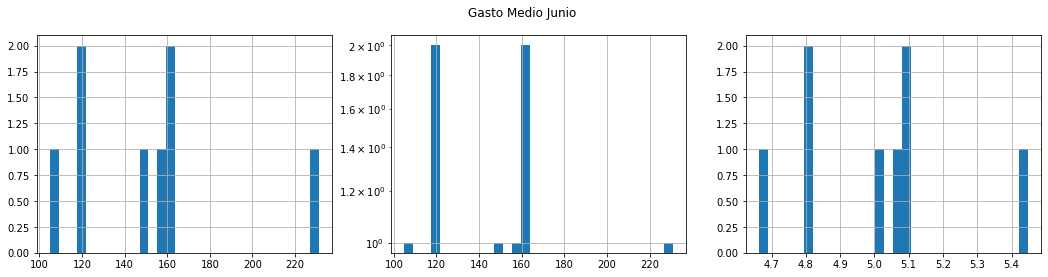

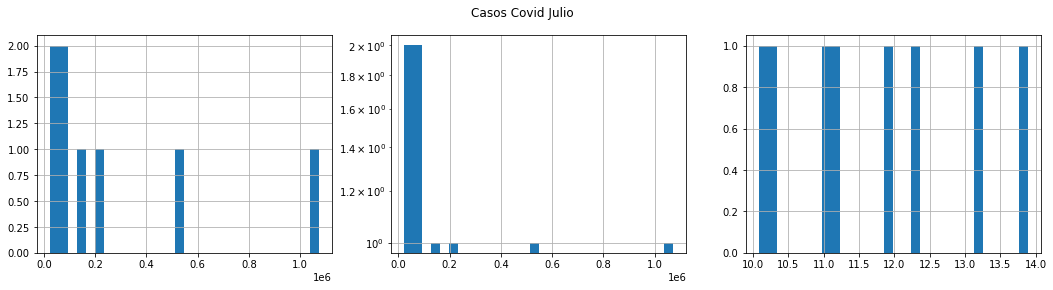

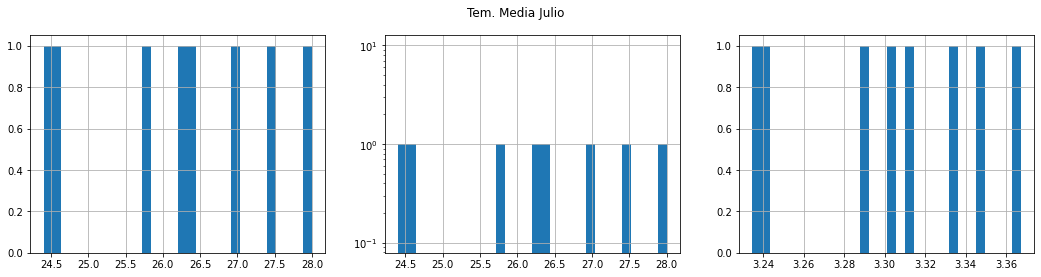

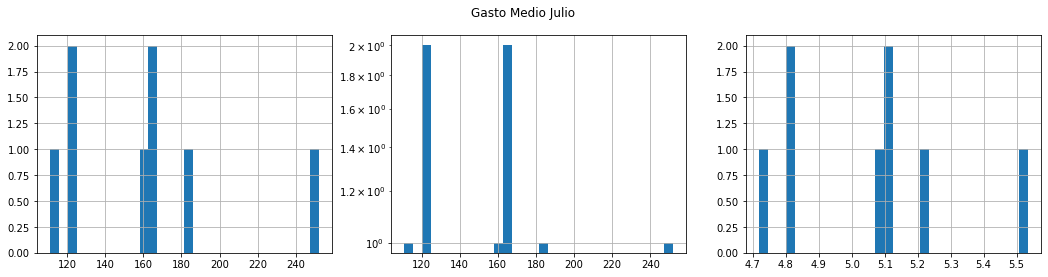

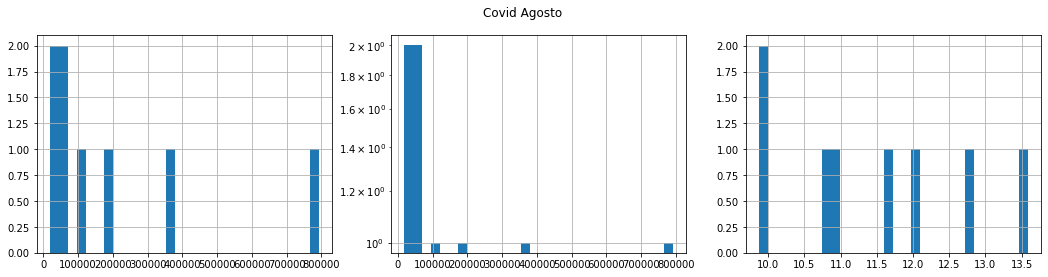

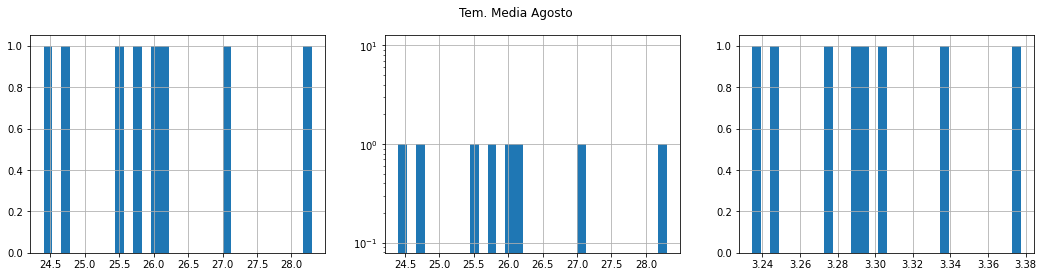

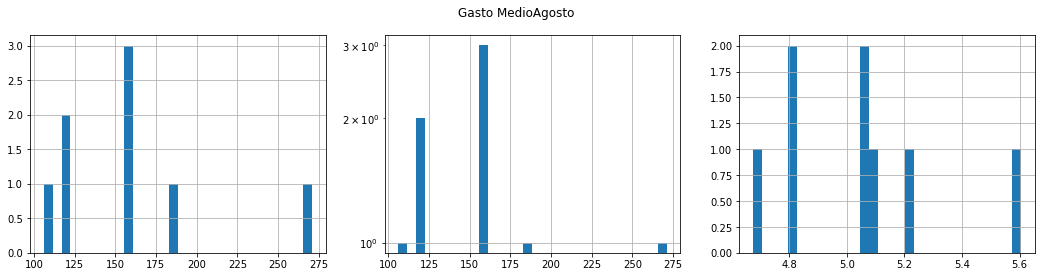

In [18]:
for var in num_vars:
  print(var)
#  display(df[var].describe())
  fig, ax = plt.subplots(1,3,figsize=(18,4))
  df[var].hist(bins=30, ax=ax[0])
  df[var].hist(bins=30, log=True, ax=ax[1])
  np.log(df[var]+1).hist(bins=30,ax=ax[2])
  plt.suptitle(var)

In [19]:
df[num_vars].head(2)

,Covid Junio,Tem. Media Junio,Gasto Medio Junio,Casos Covid Julio,Tem. Media Julio,Gasto Medio Julio,Covid Agosto,Tem. Media Agosto,Gasto MedioAgosto
0,357836,21.5,163,515673,24.6,165,364973,24.7,158
1,46339,21.3,163,64621,24.4,165,47222,24.4,158


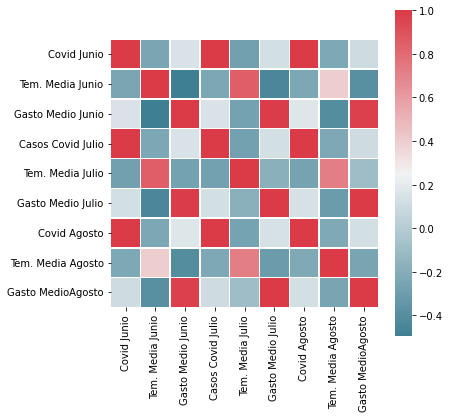

In [20]:
# Compute the correlation matrix
corr = df[num_vars].corr(method='pearson') # Pearson (linear), Spearman (non linear)

f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, cmap=cmap, vmax=1,
            square=True, linewidths=.5)

In [21]:
corr

,Covid Junio,Tem. Media Junio,Gasto Medio Junio,Casos Covid Julio,Tem. Media Julio,Gasto Medio Julio,Covid Agosto,Tem. Media Agosto,Gasto MedioAgosto
Covid Junio,1.000000,-0.244456,0.155823,0.999933,-0.279435,0.126064,0.999333,-0.229338,0.107658
Tem. Media Junio,-0.244456,1.000000,-0.496983,-0.234905,0.853357,-0.444081,-0.235738,0.402786,-0.388390
Gasto Medio Junio,0.155823,-0.496983,1.000000,0.155570,-0.268867,0.984966,0.170893,-0.409255,0.974798
Casos Covid Julio,0.999933,-0.234905,0.155570,1.000000,-0.270450,0.126386,0.999537,-0.227359,0.108735
Tem. Media Julio,-0.279435,0.853357,-0.268867,-0.270450,1.000000,-0.176643,-0.259447,0.719843,-0.096121
Gasto Medio Julio,0.126064,-0.444081,0.984966,0.126386,-0.176643,1.000000,0.143826,-0.306262,0.994506
Covid Agosto,0.999333,-0.235738,0.170893,0.999537,-0.259447,0.143826,1.000000,-0.218872,0.128035
Tem. Media Agosto,-0.229338,0.402786,-0.409255,-0.227359,0.719843,-0.306262,-0.218872,1.000000,-0.250167
Gasto MedioAgosto,0.107658,-0.388390,0.974798,0.108735,-0.096121,0.994506,0.128035,-0.250167,1.000000


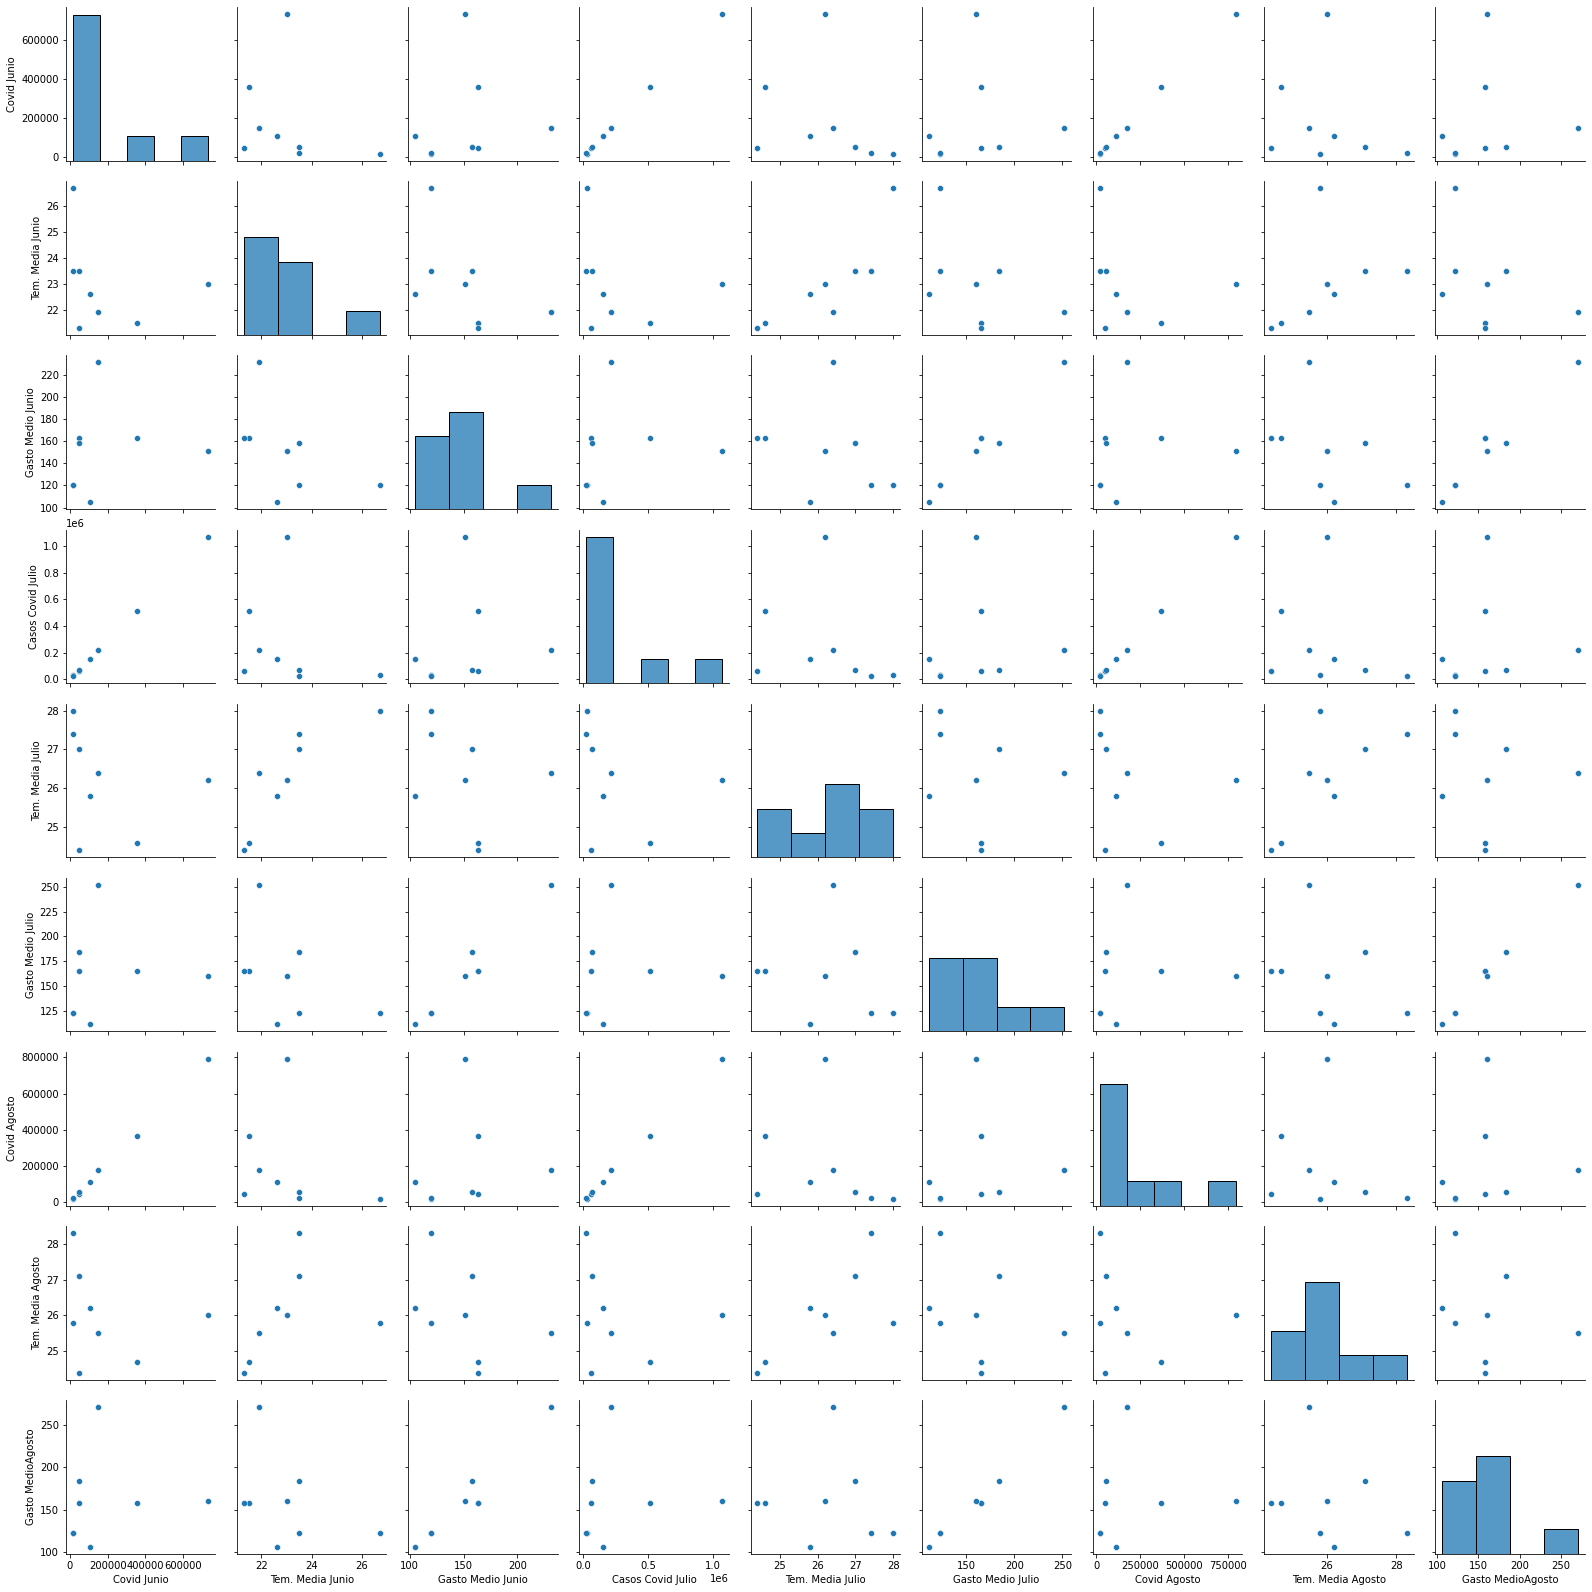

In [22]:
sns.pairplot(df[num_vars])

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
df.columns

Index(['Provincia', 'Covid Junio', 'Tem. Media Junio', 'Gasto Medio Junio',
       'Casos Covid Julio', 'Tem. Media Julio', 'Gasto Medio Julio',
       'Covid Agosto', 'Tem. Media Agosto', 'Gasto MedioAgosto'],
      dtype='object')

In [25]:
df.head()

,Provincia,Covid Junio,Tem. Media Junio,Gasto Medio Junio,Casos Covid Julio,Tem. Media Julio,Gasto Medio Julio,Covid Agosto,Tem. Media Agosto,Gasto MedioAgosto
0,Barcelona,357836,21.5,163,515673,24.6,165,364973,24.7,158
1,Girona,46339,21.3,163,64621,24.4,165,47222,24.4,158
2,Madrid,147880,21.9,231,217667,26.4,252,175203,25.5,271
3,Málaga,14422,26.7,120,29767,28.0,123,19408,25.8,122
4,Mallorca,47392,23.5,158,70203,27.0,184,55212,27.1,184


In [26]:
selected_features = ['Covid Junio','Tem. Media Junio',	'Gasto Medio Junio','Casos Covid Julio','Tem. Media Julio',	'Gasto Medio Julio',	'Covid Agosto', 'Tem. Media Agosto',	'Gasto MedioAgosto']

In [27]:
df.loc[:, selected_features].head()

,Covid Junio,Tem. Media Junio,Gasto Medio Junio,Casos Covid Julio,Tem. Media Julio,Gasto Medio Julio,Covid Agosto,Tem. Media Agosto,Gasto MedioAgosto
0,357836,21.5,163,515673,24.6,165,364973,24.7,158
1,46339,21.3,163,64621,24.4,165,47222,24.4,158
2,147880,21.9,231,217667,26.4,252,175203,25.5,271
3,14422,26.7,120,29767,28.0,123,19408,25.8,122
4,47392,23.5,158,70203,27.0,184,55212,27.1,184


In [28]:
# Filter the selected data for clustering
clustering_data = df.loc[:, selected_features].copy()

# Prepare the original dataset to 
original_data = df.loc[:, selected_features].copy()

In [29]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
clustering_data = pd.DataFrame(min_max_scaler.fit_transform(clustering_data),columns = original_data.columns)

In [30]:
clustering_data.head()

,Covid Junio,Tem. Media Junio,Gasto Medio Junio,Casos Covid Julio,Tem. Media Julio,Gasto Medio Julio,Covid Agosto,Tem. Media Agosto,Gasto MedioAgosto
0,-0.047278,-0.925926,-0.079365,-0.061579,-0.888889,-0.234043,-0.105163,-0.846154,-0.369697
1,-0.911454,-1.000000,-0.079365,-0.922361,-1.000000,-0.234043,-0.927976,-1.000000,-0.369697
2,-0.629752,-0.777778,1.000000,-0.630290,0.111111,1.000000,-0.596570,-0.435897,1.000000
3,-1.000000,1.000000,-0.761905,-0.988876,1.000000,-0.829787,-1.000000,-0.282051,-0.806061
4,-0.908532,-0.185185,-0.158730,-0.911708,0.444444,0.035461,-0.907286,0.384615,-0.054545


##KMEANS

In [31]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=666)
km = km.fit(clustering_data)
km

KMeans(n_clusters=2, random_state=666)

In [32]:
clustering_data.head()

,Covid Junio,Tem. Media Junio,Gasto Medio Junio,Casos Covid Julio,Tem. Media Julio,Gasto Medio Julio,Covid Agosto,Tem. Media Agosto,Gasto MedioAgosto
0,-0.047278,-0.925926,-0.079365,-0.061579,-0.888889,-0.234043,-0.105163,-0.846154,-0.369697
1,-0.911454,-1.000000,-0.079365,-0.922361,-1.000000,-0.234043,-0.927976,-1.000000,-0.369697
2,-0.629752,-0.777778,1.000000,-0.630290,0.111111,1.000000,-0.596570,-0.435897,1.000000
3,-1.000000,1.000000,-0.761905,-0.988876,1.000000,-0.829787,-1.000000,-0.282051,-0.806061
4,-0.908532,-0.185185,-0.158730,-0.911708,0.444444,0.035461,-0.907286,0.384615,-0.054545


In [33]:
km.__dict__.keys()

dict_keys(['n_clusters', 'init', 'max_iter', 'tol', 'n_init', 'verbose', 'random_state', 'copy_x', 'algorithm', 'feature_names_in_', 'n_features_in_', '_n_init', '_tol', '_algorithm', '_n_threads', 'cluster_centers_', 'labels_', 'inertia_', 'n_iter_'])

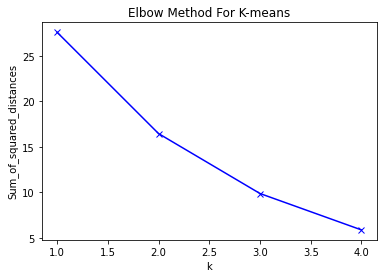

In [34]:
from sklearn.cluster import KMeans
distances = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k, random_state=666)
    km = km.fit(clustering_data)
    distances.append(km.inertia_)
plt.plot(K, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For K-means')
plt.show()

In [35]:
# Define the number of clusters
n_clusters = 3

In [36]:
# Create the clustering algorithm
clustering = KMeans(n_clusters = n_clusters, random_state=666)

# Fit the clustering
cluster_labels = clustering.fit_predict(clustering_data)

In [37]:
clustering_data.head(2)

,Covid Junio,Tem. Media Junio,Gasto Medio Junio,Casos Covid Julio,Tem. Media Julio,Gasto Medio Julio,Covid Agosto,Tem. Media Agosto,Gasto MedioAgosto
0,-0.047278,-0.925926,-0.079365,-0.061579,-0.888889,-0.234043,-0.105163,-0.846154,-0.369697
1,-0.911454,-1.000000,-0.079365,-0.922361,-1.000000,-0.234043,-0.927976,-1.000000,-0.369697


In [38]:
clustering_data['cluster'] = 'Cluster ' + pd.Series((clustering.labels_ + 1).astype(str))
original_data['cluster'] = 'Cluster ' + pd.Series((clustering.labels_ + 1).astype(str))

In [39]:
clustering_data.head()

,Covid Junio,Tem. Media Junio,Gasto Medio Junio,Casos Covid Julio,Tem. Media Julio,Gasto Medio Julio,Covid Agosto,Tem. Media Agosto,Gasto MedioAgosto,cluster
0,-0.047278,-0.925926,-0.079365,-0.061579,-0.888889,-0.234043,-0.105163,-0.846154,-0.369697,Cluster 3
1,-0.911454,-1.000000,-0.079365,-0.922361,-1.000000,-0.234043,-0.927976,-1.000000,-0.369697,Cluster 3
2,-0.629752,-0.777778,1.000000,-0.630290,0.111111,1.000000,-0.596570,-0.435897,1.000000,Cluster 3
3,-1.000000,1.000000,-0.761905,-0.988876,1.000000,-0.829787,-1.000000,-0.282051,-0.806061,Cluster 1
4,-0.908532,-0.185185,-0.158730,-0.911708,0.444444,0.035461,-0.907286,0.384615,-0.054545,Cluster 1


In [41]:
original_data_with_name = original_data.merge(df[['Provincia']], left_index=True, right_index=True)
clusters1 = original_data_with_name.sort_values('cluster')
clusters1.head()

,Covid Junio,Tem. Media Junio,Gasto Medio Junio,Casos Covid Julio,Tem. Media Julio,Gasto Medio Julio,Covid Agosto,Tem. Media Agosto,Gasto MedioAgosto,cluster,Provincia
3,14422,26.7,120,29767,28.0,123,19408,25.8,122,Cluster 1,Málaga
4,47392,23.5,158,70203,27.0,184,55212,27.1,184,Cluster 1,Mallorca
5,16959,23.5,120,23938,27.4,123,20005,28.3,122,Cluster 1,Sevilla
6,104504,22.6,105,150074,25.8,111,109738,26.2,106,Cluster 1,Valencia
7,735333,23.0,151,1071943,26.2,160,791761,26.0,160,Cluster 2,Total general


In [42]:
# Guardamos el resultado en un fichero csv separado por comas. 
clusters1.to_csv('clusters1.csv',  index=False, sep=",", decimal=".")

In [43]:
clustering_data['cluster'].value_counts()

Cluster 1    4
Cluster 3    3
Cluster 2    1
Name: cluster, dtype: int64

##Clustering Explanation

In [44]:
from scipy import stats

In [45]:
# Fix the number of cuts selected per feature
selected_cuts = 100

In [46]:
def color_explanation(cut, factor=1):
    palette = sns.color_palette('Blues', selected_cuts).as_hex()
    return f'background-color: {palette[int(factor*cut - 1)]}'

In [47]:
mean_data = original_data.groupby('cluster').mean()
feature_explanation = pd.DataFrame()

# Translate to the selected number of cuts
for feature in mean_data.columns:    
    feature_values = pd.Series(data=None, index=mean_data.index)
    xx = original_data[feature]
    for cluster in mean_data.index:                
        percentile = stats.percentileofscore(xx, mean_data[feature][cluster])
        cut = np.ceil((percentile / 100) * selected_cuts)
        if cut == 0:
            cut = 1
        feature_values[cluster] = cut
    feature_explanation[feature] = feature_values
# Final reshaping
feature_explanation = feature_explanation.T
feature_explanation.index.name = None
feature_explanation.columns.name = None

# Final sorting
feature_explanation = feature_explanation.sort_index()

# Final explanation (indexed)
feature_explanation.style.applymap(color_explanation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,Cluster 1,Cluster 2,Cluster 3
Casos Covid Julio,38.000000,100.000000,75.000000
Covid Agosto,38.000000,100.000000,75.000000
Covid Junio,25.000000,100.000000,75.000000
Gasto Medio Julio,38.000000,50.000000,88.000000
Gasto Medio Junio,38.000000,50.000000,88.000000
Gasto MedioAgosto,38.000000,75.000000,88.000000
Tem. Media Agosto,75.000000,63.000000,25.000000
Tem. Media Julio,75.000000,50.000000,25.000000
Tem. Media Junio,88.000000,63.000000,25.000000


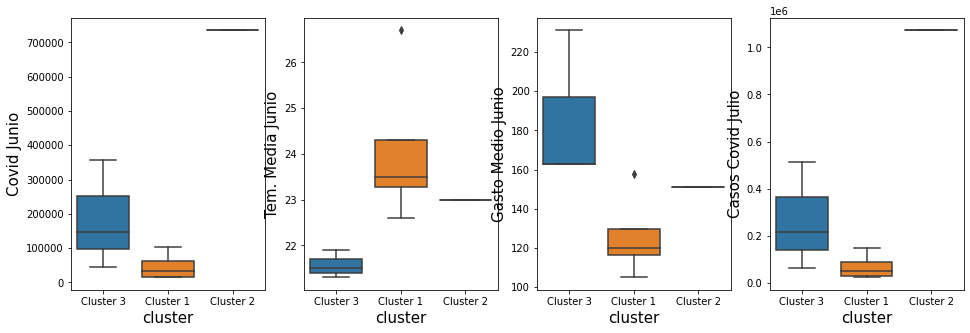

In [48]:
fig, ax = plt.subplots(1,4,figsize=(16,5))
for i,col in enumerate(selected_features[:4]):
    sns.boxplot(x="cluster", y=col, data=original_data, ax=ax[i])  # RUN PLOT   
    ax[i].set_xlabel('cluster',fontsize=15)
    ax[i].set_ylabel(col,fontsize=15)
plt.show()

In [49]:
original_data.head()

,Covid Junio,Tem. Media Junio,Gasto Medio Junio,Casos Covid Julio,Tem. Media Julio,Gasto Medio Julio,Covid Agosto,Tem. Media Agosto,Gasto MedioAgosto,cluster
0,357836,21.5,163,515673,24.6,165,364973,24.7,158,Cluster 3
1,46339,21.3,163,64621,24.4,165,47222,24.4,158,Cluster 3
2,147880,21.9,231,217667,26.4,252,175203,25.5,271,Cluster 3
3,14422,26.7,120,29767,28.0,123,19408,25.8,122,Cluster 1
4,47392,23.5,158,70203,27.0,184,55212,27.1,184,Cluster 1


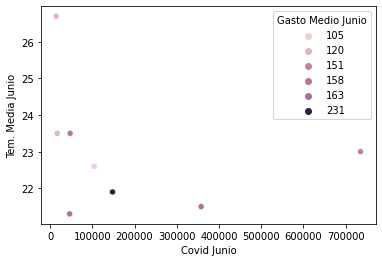

In [67]:
sns.scatterplot(data=original_data, x="Covid Junio", y="Tem. Media Junio", hue="Gasto Medio Junio")

In [66]:
# Guardamos el resultado en un fichero csv separado por comas. 
original_data.to_csv('clusters.csv',  index=False, sep=",", decimal=".")

##AgglomerativeClustering

In [51]:
from  sklearn.cluster import AgglomerativeClustering

In [52]:
#Filter the selected data for clustering
clustering_data = df.loc[:, selected_features].copy()

# Prepare the original dataset to 
original_data = df.loc[:, selected_features].copy()

In [53]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
clustering_data = pd.DataFrame(min_max_scaler.fit_transform(clustering_data),columns = original_data.columns)

In [54]:
K = 3
km = AgglomerativeClustering(n_clusters=3)
km = km.fit(clustering_data)

In [55]:
km.__dict__.keys()

dict_keys(['n_clusters', 'distance_threshold', 'memory', 'connectivity', 'compute_full_tree', 'linkage', 'affinity', 'compute_distances', 'feature_names_in_', 'n_features_in_', 'children_', 'n_connected_components_', 'n_leaves_', 'n_clusters_', 'labels_'])

In [56]:
km.linkage

'ward'

In [57]:
# Define the number of clusters
n_clusters = 3

In [58]:
# Create the clustering algorithm
clustering = AgglomerativeClustering(n_clusters = n_clusters)

# Fit the clustering
cluster_labels = clustering.fit_predict(clustering_data)

In [59]:
clustering_data['cluster'] = 'Cluster ' + pd.Series((clustering.labels_ + 1).astype(str))
original_data['cluster'] = 'Cluster ' + pd.Series((clustering.labels_ + 1).astype(str))

In [60]:
clustering_data['cluster'].value_counts()

Cluster 2    4
Cluster 1    3
Cluster 3    1
Name: cluster, dtype: int64

##Clustering Explanation

In [61]:
# Fix the number of cuts selected per feature
selected_cuts = 100

In [62]:
def color_explanation(cut, factor=1):
    palette = sns.color_palette('Blues', selected_cuts).as_hex()
    return f'background-color: {palette[int(factor*cut - 1)]}'

In [63]:
mean_data = original_data.groupby('cluster').mean()
feature_explanation = pd.DataFrame()

# Translate to the selected number of cuts
for feature in mean_data.columns:    
    feature_values = pd.Series(data=None, index=mean_data.index)
    xx = original_data[feature]
    for cluster in mean_data.index:                
        percentile = stats.percentileofscore(xx, mean_data[feature][cluster])
        cut = np.ceil((percentile / 100) * selected_cuts)
        if cut == 0:
            cut = 1
        feature_values[cluster] = cut
    feature_explanation[feature] = feature_values
# Final reshaping
feature_explanation = feature_explanation.T
feature_explanation.index.name = None
feature_explanation.columns.name = None

# Final sorting
feature_explanation = feature_explanation.sort_index()

# Final explanation (indexed)
feature_explanation.style.applymap(color_explanation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,Cluster 1,Cluster 2,Cluster 3
Casos Covid Julio,75.000000,38.000000,100.000000
Covid Agosto,75.000000,38.000000,100.000000
Covid Junio,75.000000,25.000000,100.000000
Gasto Medio Julio,88.000000,38.000000,50.000000
Gasto Medio Junio,88.000000,38.000000,50.000000
Gasto MedioAgosto,88.000000,38.000000,75.000000
Tem. Media Agosto,25.000000,75.000000,63.000000
Tem. Media Julio,25.000000,75.000000,50.000000
Tem. Media Junio,25.000000,88.000000,63.000000


In [64]:
selected_features

['Covid Junio',
 'Tem. Media Junio',
 'Gasto Medio Junio',
 'Casos Covid Julio',
 'Tem. Media Julio',
 'Gasto Medio Julio',
 'Covid Agosto',
 'Tem. Media Agosto',
 'Gasto MedioAgosto']

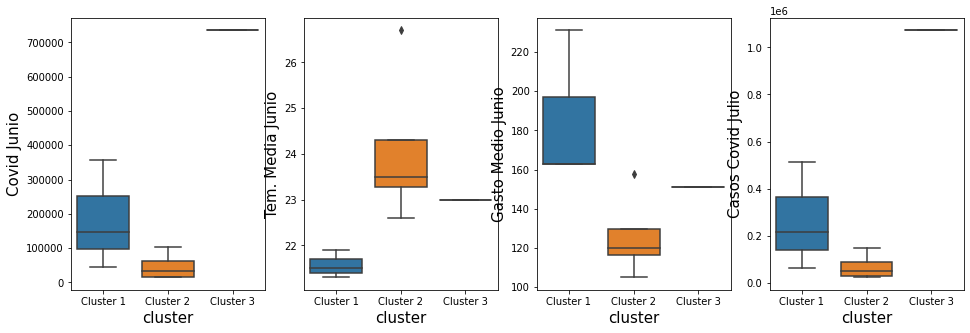

In [65]:
fig, ax = plt.subplots(1,4,figsize=(16,5))
for i,col in enumerate(selected_features[:4]):
    sns.boxplot(x="cluster", y=col, data=original_data, ax=ax[i])  # RUN PLOT   
    ax[i].set_xlabel('cluster',fontsize=15)
    ax[i].set_ylabel(col,fontsize=15)
plt.show()